In [1]:
!pip install MetaTrader5

Defaulting to user installation because normal site-packages is not writeable


In [71]:
import MetaTrader5 as mt5
import pandas as pd
import time
import numpy as np

def initialize():
    # Connect to MetaTrader 5
    if not mt5.initialize():
        print("initialize() failed, error code =", mt5.last_error())
        return False
    
    # Login to your trading account
    login = 78800425
    password = "!8TgVgZs"
    server = "MetaQuotes-Demo"
    authorized = mt5.login(login, password,server)
    
    if not authorized:
        print("Failed to login to MetaTrader 5 account. Please check your credentials.")
        return False
    
    print("Connected to MetaTrader 5 account:", login)
    return True

def close():
    # Shutdown MetaTrader 5
    mt5.shutdown()

def fetch_data(symbol, timeframe, limit):
    # Fetch historical data
    rates = mt5.copy_rates_from_pos(symbol, timeframe, 0, limit)
    df = pd.DataFrame(rates)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    return df

def crossover_strategy(data, short_window, long_window):
    # Calculate moving averages
    data['short_mavg'] = data['close'].rolling(window=short_window, min_periods=1).mean()
    data['long_mavg'] = data['close'].rolling(window=long_window, min_periods=1).mean()

    # Generate buy/sell signals
    data['signal'] = 0
    data.loc[data['short_mavg'] > data['long_mavg'], 'signal'] = 1
    data.loc[data['short_mavg'] < data['long_mavg'], 'signal'] = -1
#     print(data['signal'].tail(3))
    return data['signal'].iloc[-1]
initialize()
symbol = "EURUSD"
timeframe = mt5.TIMEFRAME_M1
short_window = 5
long_window = 15
limit = 1000
data = fetch_data(symbol, timeframe, limit)
data
# Compute simple returns
# data['simple_return'] = data['close'].pct_change() * 100

# Compute log returns
# data['log_return'] = data['close'].apply(lambda x: None if x == 0 else np.log(x / data['close'].shift(1)))

data

Connected to MetaTrader 5 account: 78800425


,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2024-02-02 07:19:00,1.08749,1.08759,1.08747,1.08753,94,3,0
2024-02-02 07:20:00,1.08753,1.08761,1.08749,1.08759,45,3,0
2024-02-02 07:21:00,1.08758,1.08766,1.08757,1.08762,96,3,0
2024-02-02 07:22:00,1.08763,1.08765,1.08757,1.08760,44,3,0
2024-02-02 07:23:00,1.08761,1.08764,1.08760,1.08763,47,3,0
...,...,...,...,...,...,...,...
2024-02-02 23:54:00,1.07879,1.07884,1.07875,1.07881,99,15,0
2024-02-02 23:55:00,1.07885,1.07886,1.07874,1.07874,16,4,0
2024-02-02 23:56:00,1.07875,1.07881,1.07870,1.07871,31,8,0


## Arima model

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 1.0320199784935328e-07


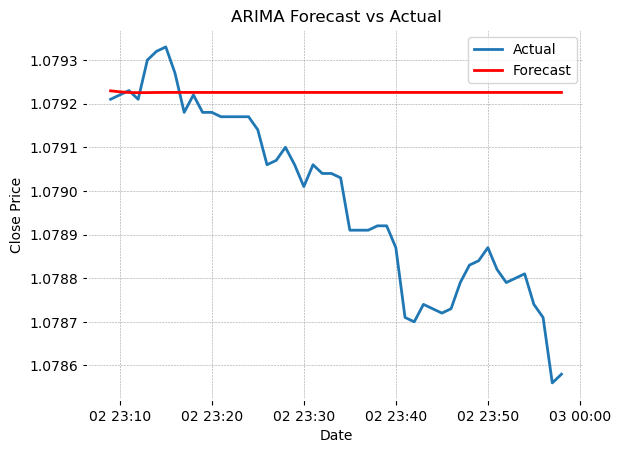

In [72]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
# For ARIMA modeling, you typically use one-dimensional time series data
# You can choose which feature you want to use for modeling, let's say 'close' price

ts_data = data['close']  # Assuming 'close' is the column containing closing prices

# Step 1: Train-Test Split
train_size = int(len(ts_data) * 0.95)  # 90% for training
train_data, test_data = ts_data[:train_size], ts_data[train_size:]

# Step 2: Fit the Model
model = ARIMA(train_data, order=(2, 1, 2))
arima_result = model.fit()

# Step 3: Make Predictions
forecast = arima_result.forecast(steps=len(test_data))
# print(forecast)
# Step 4: Evaluate Predictions
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_data, forecast)
print("Mean Squared Error:", mse)

# Step 5: Visualize Results
import matplotlib.pyplot as plt

plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()

## LSTM 

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Mean Squared Error: 1.5174275219471784e-05


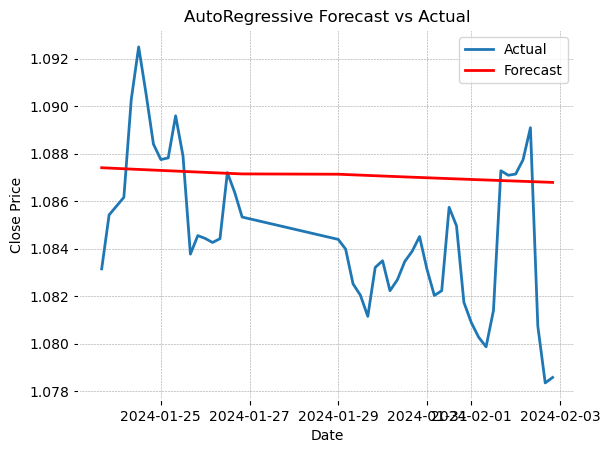

In [52]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load and preprocess data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data) 

# Split data into train/test sets 
X_train, y_train = scaled_data[:1000], scaled_data[1:1001] 
X_test, y_test = scaled_data[1000:], scaled_data[1001:]

# Reshape input data into 3D format 
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1] ))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train.shape[1]))) 
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))  
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Train model 
model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)

# Generate predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Evaluate model skill 
model.evaluate(X_test, y_test)

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 924.3/924.3 kB 6.5 MB/s eta 0:00:00


# Linear Regression

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your DataFrame is named 'data'

# Select features (independent variables) for prediction
features = ['open', 'high', 'low', 'tick_volume', 'spread', 'real_volume']

# Select the target variable
target = 'close'

# Drop rows with missing values
data = data.dropna()

# Split data into features (X) and target variable (y)
X = data[features]
y = data[target]

# Define the split point (e.g., 80% of data for training)
split_point = int(0.9 * len(data))

# Split data into training and testing sets
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.32745035851123e-08


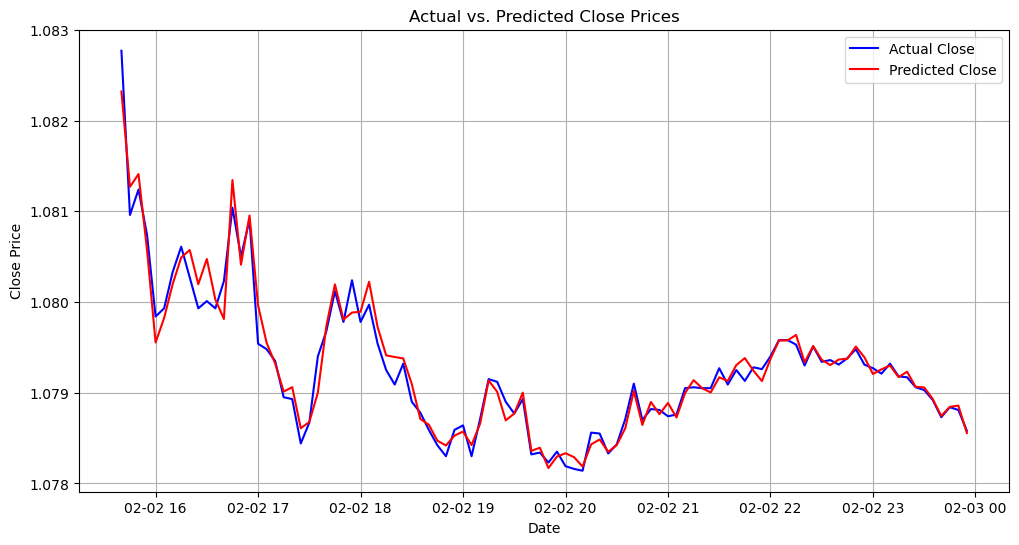

In [4]:
import matplotlib.pyplot as plt


# Plot actual and predicted close prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[split_point:], y_test, label='Actual Close', color='blue')
plt.plot(data.index[split_point:], predictions, label='Predicted Close', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices')
plt.legend()
plt.grid(True)
plt.show()

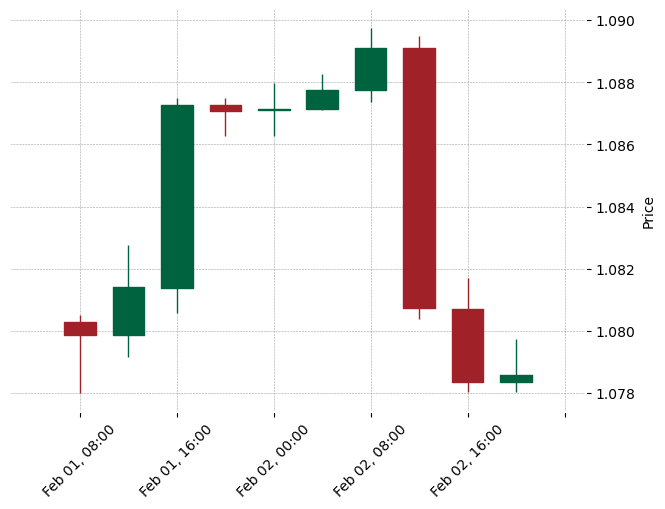

Index(['open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume',
       'simple_return'],
      dtype='object')

In [8]:
import pandas as pd
import mplfinance as mpf


# Plotting candlestick chart
mpf.plot(data.tail(10), type='candle', style='charles', volume=False)
data.columns

In [23]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
# For ARIMA modeling, you typically use one-dimensional time series data
# You can choose which feature you want to use for modeling, let's say 'close' price

ts_data = data['close']  # Assuming 'close' is the column containing closing prices


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\A

Mean Squared Error: 1.7747204783788927e-05


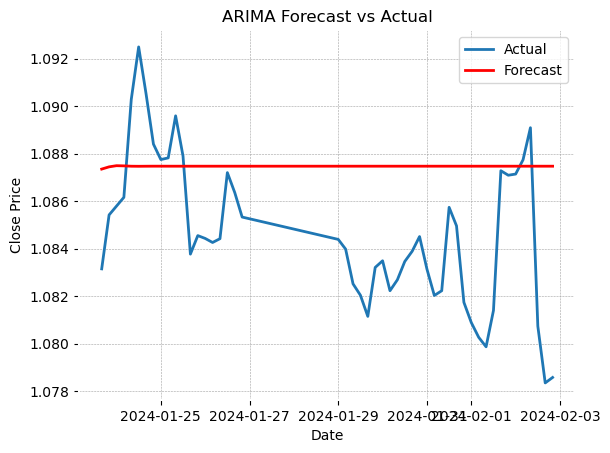

In [28]:
# Step 1: Train-Test Split
train_size = int(len(ts_data) * 0.95)  # 90% for training
train_data, test_data = ts_data[:train_size], ts_data[train_size:]

# Step 2: Fit the Model
model = ARIMA(train_data, order=(2, 1, 2))
arima_result = model.fit()

# Step 3: Make Predictions
forecast = arima_result.forecast(steps=len(test_data))
# print(forecast)
# Step 4: Evaluate Predictions
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_data, forecast)
print("Mean Squared Error:", mse)

# Step 5: Visualize Results
import matplotlib.pyplot as plt

plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()

In [19]:
print(arima_result.summary())
# 

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  900
Model:                 ARIMA(2, 1, 2)   Log Likelihood                4350.062
Date:                Sat, 03 Feb 2024   AIC                          -8690.124
Time:                        18:41:09   BIC                          -8666.117
Sample:                             0   HQIC                         -8680.952
                                - 900                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2306      1.047      0.220      0.826      -1.821       2.283
ar.L2         -0.2359      0.518     -0.455      0.649      -1.251       0.779
ma.L1         -0.1622      1.047     -0.155      0.8

In [20]:
# # You can make predictions using the fitted ARIMA model
# # For example, let's make a one-step ahead forecast

# forecast = arima_result.forecast(steps=1)
# print("Forecasted value:", forecast[0])


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramData\A

900    1.097790
901    1.097788
902    1.097795
903    1.097797
904    1.097796
         ...   
995    1.097795
996    1.097795
997    1.097795
998    1.097795
999    1.097795
Name: predicted_mean, Length: 100, dtype: float64
Mean Squared Error: 0.0001228631987672449


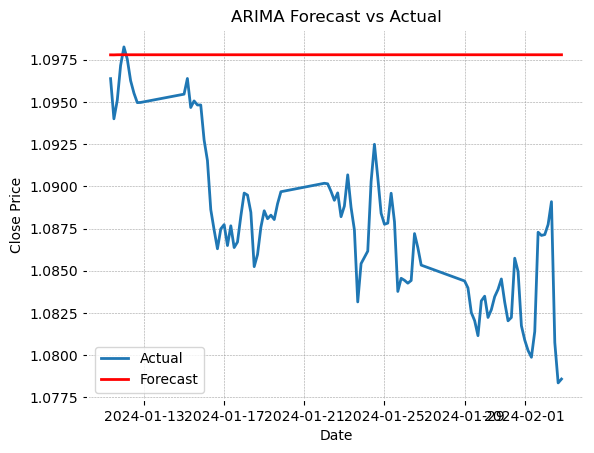

## LSTM

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [4]:
# !pip install tensorflow
# Assuming your data is already loaded into a DataFrame called 'data'
# If not, you can load it using pd.read_csv() or any other method
# Make sure the index of your DataFrame is datetime

# Example:
# data = pd.read_csv('forex_data.csv', parse_dates=['datetime'], index_col='datetime')

# Use 'close' price as the feature
ts_data = data['close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
ts_data_scaled = scaler.fit_transform(ts_data)


In [6]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length (number of time steps to look back)
seq_length = 10

# Create sequences
X, y = create_sequences(ts_data_scaled, seq_length)


In [9]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


ValueError: operands could not be broadcast together with shapes (198,10,1) (198,1) 

In [10]:
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [11]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100

25/25 [==============================] - 3s 34ms/step - loss: 0.0341 - val_loss: 0.0123
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0045 - val_loss: 0.0102
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0027 - val_loss: 0.0085
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0023 - val_loss: 0.0075
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0022 - val_loss: 0.0079
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0022 - val_loss: 0.0077
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0021 - val_loss: 0.0070
Epoch 8/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0021 - val_loss: 0.0072
Epoch 9/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0021 - val_loss: 0.0070
Epoch 10/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0021 - val_loss: 0.0080
Epoch 1

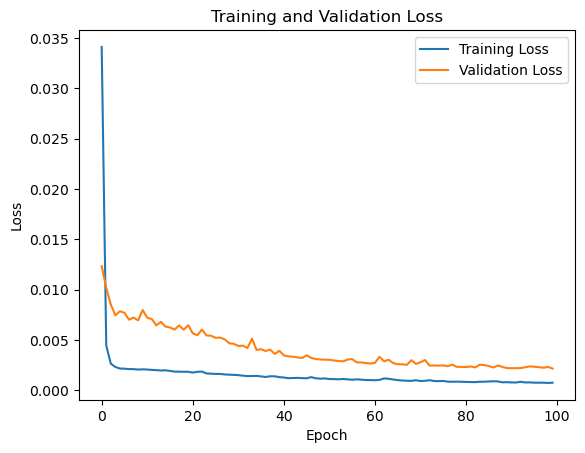

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


7/7 [==============================] - 1s 4ms/step


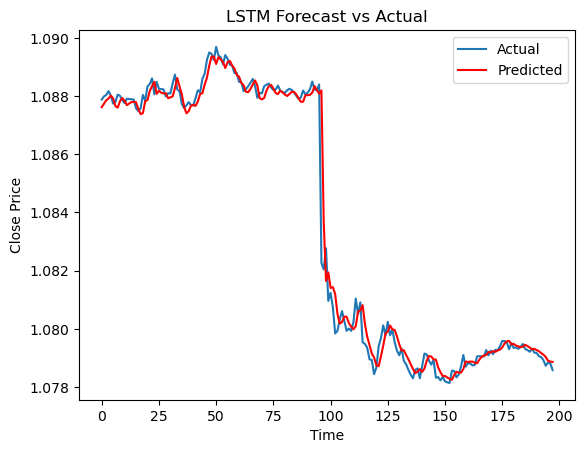

In [13]:
y_pred = model.predict(X_test)

# Inverse scaling
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Visualize predictions
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('LSTM Forecast vs Actual')
plt.legend()
plt.show()


In [ ]:
def main():
    if not initialize():
        return

    symbol = "EURUSD"
    timeframe = mt5.TIMEFRAME_M5
    short_window = 5
    long_window = 15
    limit = 1000

    while True:
        data = fetch_data(symbol, timeframe, limit)
        signal = crossover_strategy(data, short_window, long_window)
        print(signal)
    
        if signal == 1:
            print("Buy signal detected")
            request = {
                "action": mt5.TRADE_ACTION_DEAL,
                "symbol": "EURUSD",
                "volume": 2.0, # FLOAT
                "type": mt5.ORDER_TYPE_BUY,
                "price": mt5.symbol_info_tick("EURUSD").ask,
                "sl": 0.0, # FLOAT
                "tp": 0.0, # FLOAT
                "deviation": 100, # INTERGER
                "magic": 234000, # INTERGER
                "comment": "python script open",
                "type_time": mt5.ORDER_TIME_GTC,
                "type_filling": mt5.ORDER_FILLING_IOC,
            }

            result = mt5.order_send(request)
            print(result)
            if result.retcode != mt5.TRADE_RETCODE_DONE:
                print("Failed to execute buy order:", result.comment)
        elif signal == -1:
            print("Sell signal detected")
            # Execute a sell order
            request = {
                "action": mt5.TRADE_ACTION_DEAL,
                "symbol": "EURUSD",
                "volume": 2.0, # FLOAT
                "type": mt5.ORDER_TYPE_SELL,
                #"position": 158631228, # select the position you want to close
                "price": mt5.symbol_info_tick("EURUSD").ask,
                "sl": 0.0, # FLOAT
                "tp": 0.0, # FLOAT
                "deviation": 100, # INTERGER
                "magic": 234000, # INTERGER
                "comment": "python script open",
                "type_time": mt5.ORDER_TIME_GTC,
                "type_filling": mt5.ORDER_FILLING_IOC,
            }

            result = mt5.order_send(request)
            print(result)
            if result.retcode != mt5.TRADE_RETCODE_DONE:
                print("Failed to execute sell order:", result.comment)

        time.sleep(300)  # Check for signals every 60 seconds

    close()

if __name__ == "__main__":
    main()


In [ ]:
# login 78800425
# password !8TgVgZs
# readonly password *6JmFsEv

In [5]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import time
def trade(signal):
    if signal == 1:
        print("Buy signal detected")
        request = {
            "action": mt5.TRADE_ACTION_DEAL,
            "symbol": "EURUSD",
            "volume": 2.0, # FLOAT
            "type": mt5.ORDER_TYPE_BUY,
            "price": mt5.symbol_info_tick("EURUSD").ask,
            "sl": 0.0, # FLOAT
            "tp": 0.0, # FLOAT
            "deviation": 20, # INTERGER
            "magic": 234000, # INTERGER
            "comment": "python script open",
            "type_time": mt5.ORDER_TIME_GTC,
            "type_filling": mt5.ORDER_FILLING_IOC,
        }

        result = mt5.order_send(request)
        print(result)
        if result.retcode != mt5.TRADE_RETCODE_DONE:
            print("Failed to execute buy order:", result.comment)
    elif signal == 0:
        print("Sell signal detected")
        # Execute a sell order
        request = {
            "action": mt5.TRADE_ACTION_DEAL,
            "symbol": "EURUSD",
            "volume": 2.0, # FLOAT
            "type": mt5.ORDER_TYPE_SELL,
            #"position": 158631228, # select the position you want to close
            "price": mt5.symbol_info_tick("EURUSD").ask,
            "sl": 0.0, # FLOAT
            "tp": 0.0, # FLOAT
            "deviation": 20, # INTERGER
            "magic": 234000, # INTERGER
            "comment": "python script open",
            "type_time": mt5.ORDER_TIME_GTC,
            "type_filling": mt5.ORDER_FILLING_IOC,
        }

        result = mt5.order_send(request)
        print(result)
        if result.retcode != mt5.TRADE_RETCODE_DONE:
            print("Failed to execute sell order:", result.comment)




In [6]:
def initialize():
    """
    Connects to MetaTrader 5 and logs in to a trading account.
    """
    if not mt5.initialize():
        print("initialize() failed, error code =", mt5.last_error())
        return False
    
    # Login to your trading account
    login = 78800425
    password = "!8TgVgZs"
    server = "MetaQuotes-Demo"
    authorized = mt5.login(login, password, server)

In [ ]:
def close_previous_positions(trade_signal, symbol="EURUSD"):
    """
    Closes previous positions if trade signal changes.
    """
    positions = mt5.positions_get(symbol=symbol)
    print(positions)
    if positions is not None:
        for position in positions:
            print(position.type,trade_signal)
            if trade_signal == position.type:
                close_position(position)

                
def reverse(type):
    if type == mt5.ORDER_TYPE_BUY:
        return mt5.ORDER_TYPE_SELL
    elif type == mt5.ORDER_TYPE_SELL:
        return mt5.ORDER_TYPE_BUY
        
    
def close_position(position):
    """
    Closes a specific position.
    """
    # Retrieve symbol information
    symbol_info = mt5.symbol_info(position.symbol)
    if not symbol_info.visible:
        print("Symbol not found or not tradable:", position.symbol)
        return

    # Determine closing price based on position type
    if position.type == mt5.ORDER_TYPE_BUY:
        closing_price = symbol_info.bid
    elif position.type == mt5.ORDER_TYPE_SELL:
        closing_price = symbol_info.ask
    else:
        print("Invalid position type:", position.type)
        return
#     print(reverse(position.type))
    # Close position
    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "position": position.ticket,
        "type": reverse(position.type),
        "volume": position.volume,
        "symbol": position.symbol,
        "price": closing_price,
        "comment": "Closing position",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_IOC,
        "deviation":20
    }

    # Send order to close position
    result = mt5.order_send(request)
    if result.retcode == mt5.TRADE_RETCODE_DONE:
        print("Closed position:", position.ticket)
    else:
        print("Failed to close position. Error code:", result.retcode)
        print("Error comment:", result.comment)

In [ ]:
close_previous_positions(1)

In [9]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np

def initialize():
    """
    Connects to MetaTrader 5 and logs in to a trading account.
    """
    if not mt5.initialize():
        print("initialize() failed, error code =", mt5.last_error())
        return False
    
    # Login to your trading account
    login = 78800425
    password = "!8TgVgZs"
    server = "MetaQuotes-Demo"
    authorized = mt5.login(login, password, server)
    
    if not authorized:
        print("Failed to login to MetaTrader 5 account. Please check your credentials.")
        return False
    
    print("Connected to MetaTrader 5 account:", login)
    return True

def close():
    """
    Shuts down the MetaTrader 5 connection.
    """
    mt5.shutdown()

def fetch_data(symbol, timeframe, limit):
    """
    Fetches historical OHLCV data for a given symbol, timeframe, and limit.
    """
    rates = mt5.copy_rates_from_pos(symbol, timeframe, 0, limit)
    df = pd.DataFrame(rates)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    return df

def moving_average_crossover_signal(data, short_window, long_window):
    """
    Generates buy signals based on a simple moving average crossover strategy.
    """
    data['short_mavg'] = data['close'].rolling(window=short_window, min_periods=1).mean()
    data['long_mavg'] = data['close'].rolling(window=long_window, min_periods=1).mean()
    
    # Generate buy signals when short-term moving average crosses above long-term moving average
    signals = np.where(data['short_mavg'] > data['long_mavg'], 1, 0)
    
    return signals

def rsi_signal(data, window=14, threshold=30):
    """
    Generates buy signals based on the Relative Strength Index (RSI) indicator.
    """
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    
    # Generate buy signals when RSI crosses below a specified threshold
    signals = np.where(rsi < threshold, 1, 0)
    
    return signals

def macd_signal(data, short_window=12, long_window=26, signal_window=9):
    """
    Generates buy signals based on the Moving Average Convergence Divergence (MACD) indicator.
    """
    exp_short = data['close'].ewm(span=short_window, adjust=False).mean()
    exp_long = data['close'].ewm(span=long_window, adjust=False).mean()
    macd_line = exp_short - exp_long
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    
    # Generate buy signals when MACD line crosses above signal line
    signals = np.where(macd_line > signal_line, 1, 0)
    
    return signals

def combine_signals(signals_list):
    """
    Combines signals from multiple strategies into a single array.
    """
    combined_signals = np.sum(signals_list, axis=0)
    return combined_signals

def generate_trade_signal(combined_signals):
    """
    Generates a trade signal based on the consensus of combined signals.
    """
    majority_buy = np.sum(combined_signals == 1) > len(combined_signals) / 2
    majority_sell = np.sum(combined_signals == -1) > len(combined_signals) / 2

    if majority_buy:
        return 1  # Buy signal
    elif majority_sell:
        return -1  # Sell signal
    else:
        return 0  # No signal

def main():
    if not initialize():
        return

    symbol = "EURUSD"
    timeframe = mt5.TIMEFRAME_M5
    limit = 1000
   

    while True:
        # Fetch historical data
        data = fetch_data(symbol, timeframe, limit)

        # Define parameters for moving average crossover strategy
        short_window = 5
        long_window = 20

        # Generate buy signals based on different strategies
        ma_crossover_signals = moving_average_crossover_signal(data, short_window, long_window)
        rsi_signals = rsi_signal(data)
        macd_signals = macd_signal(data)
        # Combine signals from different strategies
        combined_signals = combine_signals([ma_crossover_signals, rsi_signals, macd_signals])

        # Generate a single trade signal based on the consensus of combined signals
        trade_signal = generate_trade_signal(combined_signals)


#         Close previous positions
#         close_previous_positions(trade_signal)
        print(trade_signal)
    
#         trade(trade_signal)
        time.sleep(60)
        
#     close()

if __name__ == "__main__":
    main()


Connected to MetaTrader 5 account: 78800425
0


KeyboardInterrupt: 